In [ ]:
# MIT License
#
# @title Copyright (c) 2024 Mauricio Tec { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.



# Welcome to LLMs as Autonomous Agents: Part I


<img src="https://drive.google.com/uc?export=view&id=1a7t6lpNbY3WdzS5oxqK4w7SBkGs8K7dC" alt="drawing" width="200"/>

**HDSI Winter Workshop**

March 6, 2025

[**Mauricio Tec**](mauriciogtec.com)<br>
**Harvard University**<br>
[`mauriciogtec@g.harvard.edu`](mailto:mauriciogtecg.harvard.edu)

<img src="https://drive.google.com/uc?export=view&id=1g6QtX-26ks4ScU6sCFn_D4GvZeunn7T4" alt="drawing" width="400"/>


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**TL;DR**. This interactive tutorial the key conceptual frame in LLM agent systems and provides in practice experience with techniques such as chain of thought, ReAct, and memory retrieval for interactive decision-making.

## Software Prerequisites & Setup


### Install Packages


The main library we will use for this demo is `smolagents`
a new Agentic AI framework released only a few moenths ago by `HuggingFace` designed to be extremely lightweight, yet powerful.

⚠️: You might receive an error due to the pandas and colab version. You can safely ignore.

In [2]:
%pip install -q  smolagents[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65

### Utility Functions

In [3]:
# @title Markdown printing
# Since LLM outputs are typically formatted as markdown,
# the following utility function will get us a long way with nice printing in a notebook

from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

test = "`This is code`. **This is bold**."
printmd(test)

`This is code`. **This is bold**.

### LLM Setup

For the first part of the tutorial we will use mostly OpenAI and HuggingFace. Make sure the APIs.



We will use Groq as the LLM API provider since it provides a free tier trying open-source LLMs.
Setting up takes only a minute: (https://console.groq.com/login)

In [4]:
import os
from google.colab import userdata # to retrieve API key from colab
from litellm import completion # litellm is a common API for many llm providers

# @title Using the free-tier Groq API for LLMs with LiteLLM

# comment the following lines if you are not in Colab
#   make sure that you added your GROQ_API_KEY to your Colab secrets
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# if you are in your local computer and have not yet exported
# your key as an environment variable:
#   os.environ["GROQ_API_KEY"]  = <your-key>

model = "groq/llama-3.3-70b-versatile"


# make messages dict using the standard openai chat structure

prompt = """
Explain the standard openai chat API for llms based on
a JSON list of messages.  Why is this API so widely used?
Your answer should be short.
Include an example with five entries in a chat history.
Explain the roles (system, user, assistant) and content.
Do we always need the system prompt?
"""

messages=[
    {"role": "system", "content": "You are an enthusiastic AI assistant."},
    {"role": "user", "content": prompt}
]

response = completion(messages=messages, model=model)

printmd(response.choices[0].message.content)

The OpenAI Chat API uses a JSON list of messages, where each message contains a role (system, user, or assistant) and content. This API is widely used due to its simplicity and flexibility.

Example:
```json
[
  {"role": "system", "content": "You are a helpful assistant"},
  {"role": "user", "content": "Hello, how are you?"},
  {"role": "assistant", "content": "I'm doing well, thanks! How can I help you?"},
  {"role": "user", "content": "What's the weather like today?"},
  {"role": "assistant", "content": "It's sunny, with a high of 75°F"}
]
```
The system prompt is optional, but it provides context for the conversation. It's not always needed, especially if the conversation is self-explanatory. The user and assistant roles represent the input and output of the conversation, respectively.

_________

# I. Introduction to LLM Agents


* LLM agents are programs where LLMs control the flow, performing *actions* in an interactive environment [(Sumers et al. 2024)](https://arxiv.org/pdf/2309.02427v3)

* Examples include autonomous robots, digital assistants, recommendation systems, video game NPCs, web crawler, etc.

* Even a simple Q&A task can be approach in an *agentic* way, by breaking down the steps to a solution in multiple sequential steps, each which can use tools or produce thoughts.

* Design patterns of LLM agents include:

  * Reasoning
  * Tools
  * Memory
  * Planning

* We will explore and see in action these topics in this part of the tutorial.

**Philosophy of this Tutorial** We aim for a balance between using the current agentic AI stack and understanding core principles. Sometimes we will use existing abstractions, but we will re-implement some of them using open-source in-device LLMs from HuggingFace.


<img src="https://drive.google.com/uc?export=view&id=1SnyymyuwCdj_kFKTx8EQZXXXAPNYaJ9z" alt="drawing" width="125"/>




## Agentic Framework: `smolagents`

`smolagents` is recent framework developed in `HuggingFace`. It is a pretty lightweight tool with a lot of agentic functionality and compatibility with many LLM providers. Here we will test we can run it and provide a nice little example.

## Examples

Let's start with a few short examples...

In [ ]:
# @title ArXiv Paper Finder
from smolagents import (
    CodeAgent,
    LiteLLMModel
    UserInputTool,
    DuckDuckGoSearchTool,
    VisitWebpageTool,
    tool
)


task = """
Your task is to help find research papers on arxiv related to a topic.
Start by asking the user the topic. Your final answer must contain the links to
 the papers and an arxiv citation with the authors and year.
Include only the top three more relevant papers.
"""


@tool
def arxiv_search(query: str, num_results: int = 10) -> list[dict[str, str]]:
    """
    Search arXiv for research papers and return titles, abstracts, and links.

    Args:
        query: The search term.
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing title, abstract, and link.
    """
    import requests
    from xml.etree import ElementTree
    url = f"http://export.arxiv.org/api/query?search_query={query}&max_results={num_results}"
    response = requests.get(url)
    root = ElementTree.fromstring(response.content)

    results = []
    for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title").text.strip()
        abstract = entry.find("{http://www.w3.org/2005/Atom}summary").text.strip()
        link = entry.find("{http://www.w3.org/2005/Atom}id").text.strip()

        results.append({"title": title, "abstract": abstract, "link": link})

    return results


# == List all the desired tools
tools = [
    UserInputTool(),
    VisitWebpageTool(),
    arxiv_search,
]

# == Initialize OpenAI Model class wrapper
model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Initialize Agent
agent = CodeAgent(model=model, tools=tools, planning_interval=2)


# == Start agent loop
result = agent.run(task)
print(result)

In [5]:
# @title Coding Project Template Creator based on Github Trending Repos

from smolagents import (
    CodeAgent,
    LiteLLMModel,
    UserInputTool,
    VisitWebpageTool,
    tool
)

# == Setup model

# model=LiteLLMModel(
#     model_id="groq/llama-3.3-70b-versatile",
#     api_base="https://api.groq.com/openai/v1",
#     api_key=os.getenv("GROQ_API_KEY"),
# )

model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Setup tools

@tool
def github_trending_repos(topic: str, num_results: int=20) -> list[dict[str, str]]:
    """
    Search GitHub for trending repositories based on a topic.

    Args:
        topic: The search topic (e.g., "machine learning").
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing repository name, description, stars, and URL.
    """
    import requests
    url = f"https://api.github.com/search/repositories?q={topic}+sort:stars&per_page={num_results}"
    headers = {"Accept": "application/vnd.github.v3+json"}

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return f"Error: Unable to fetch results (status code {response.status_code})"

    data = response.json()
    results = []

    for repo in data.get("items", []):
        results.append({
            "name": repo["full_name"],
            "description": repo["description"],
            "stars": repo["stargazers_count"],
            "url": repo["html_url"]
        })

    return results


@tool
def write_to_file(path: str, content: str) -> None:
    """
    Write content to a file. Needed for safety since the agent's code is not
    allowed to execute unauthorized functions.

    Args:
        path: The name of the path/file to write to. If the path ends with /
              it is assumed to be a directory.
        content: The content to write to the file.
    """
    import os
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "a") as f:
        f.write(content)


tools=[
    UserInputTool(),
    VisitWebpageTool(),
    github_trending_repos,
    write_to_file,
]

# == Create Agent
agent = CodeAgent(
    model=model,
    tools=tools,
    additional_authorized_imports=["os", "shutil", "random"],
    planning_interval=4,
    max_steps=10,

)

# == Run Task

task = """
Your task is to help design a new coding project template based on existing high-quality
trending repositories.

Here are instructions:
* Ask the user for the overall topic.
* Search the Github trending repositories for the selected topic / requirements
  Choose a repository based on code quality and Github stars to use as blueprint.
* Navigate to the selected repository to inspect the folder and file structure.
  Use it as a reference for the new project template. Create the new project template
  in in a directory called `template_xxxx` where xxxxx is a random number.
  Use the write_to_file tool instead of the open function for safety.
  The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.
* Include a pip requirements with packages based on the selected repo and topic.
* Create a README.md that describes all the file structure (use a nice diagram),
  installation instructions, dependencies, example run code, configs, etc.
  The overall readme must look attractive, use emojis.
  At the end of the readme mention the Github repository used as reference, and a statement
  tht all the contents have been autogenerated by a `smolagents` LLM agent.
* Your final answer should be a dictionary with keys 'readme' and 'path' as in
  `final_answer({'readme': '...', 'path': '...'})`.
  The value of the readme should be the content of README.md.
  The value of path is the location where project was created.
"""

result = agent.run(task)

# == Print results
printmd(f"### README")
printmd(result['readme'])

printmd(f"### Verify file structure at {result['path']}")
%ls -lah {result['path']}

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Your task is to help design a new coding project template based on existing high-quality                        │
│ trending repositories.                                                                                          │
│                                                                                                                 │
│ Here are instructions:                                                                                          │
│ * Ask the user for the overall topic.                                                                           │
│ * Search the Github trending repositories for the selected topic / requirements                                 │
│   Choose a repository based on code quality and Github stars to use as blueprint.                               │
│ * Navigate to the selected repository to inspect the folder and file structure.                                 │
│   Use it as a reference for the new project template. Create the new project template                           │
│   in in a directory called `template_xxxx` where xxxxx is a random number.                                      │
│   Use the write_to_file tool instead of the open function for safety.                                           │
│   The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.            │
│ * Include a pip requirements with packages based on the selected repo and topic.                                │
│ * Create a README.md that describes all the file structure (use a nice diagram),                                │
│   installation instructions, dependencies, example run code, configs, etc.                                      │
│   The overall readme must look attractive, use emojis.                                                          │
│   At the end of the readme mention the Github repository used as reference, and a statement                     │
│   tht all the contents have been autogenerated by a `smolagents` LLM agent.                                     │
│ * Your final answer should be a dictionary with keys 'readme' and 'path' as in                                  │
│   `final_answer({'readme': '...', 'path': '...'})`.                                                             │
│   The value of the readme should be the content of README.md.                                                   │
│   The value of path is the location where project was created.                                                  │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o ─────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
                ```
                ```
1. Use the `user_input` tool to ask the user for the overall topic of the coding project.

2. Use the `github_trending_repos` tool to search for trending repositories related to the provided topic. Set the 
number of results to a reasonable limit, such as 5, to manage data size.

3. Review the results from the GitHub trending search and select a repository based on code quality indicators and 
the number of GitHub stars.

4. Use the `visit_webpage` tool to navigate to the chosen repository's page and inspect its content to understand 
the project structure, including folders and files such as scripts, notebooks, configs, etc.

5. Generate a random number to be used in the creation of a new project template directory named `template_xxxx`, 
where `xxxx` is the generated random number.

6. Use the `write_to_file` tool to create the new project template directory and replicate the identified structure
from the selected GitHub repository. This structure should include templates for scripts, notebooks, configuration 
files, etc.

7. Analyze the dependencies of the chosen repository to compile a list of packages and their versions. Write this 
list into a `requirements.txt` file in the new project directory using the `write_to_file` tool.

8. Construct a detailed and attractive README.md file. This file should:
   - Describe the overall project and its purpose.
   - Include a diagram of the file structure.
   - Provide installation instructions, list dependencies, and include example run code and configurations.
   - Mention the original GitHub repository used as a reference.
   - State that all contents were autogenerated by a `smolagents` LLM agent.
   - Use emojis and markdown formatting to enhance readability and appeal.
   - Write the README.md file to the new project directory using the `write_to_file` tool.

9. Compile the `final_answer` by creating a dictionary with the content of README.md as the 'readme' key's value 
and the path of the newly created project directory as the 'path' key's value.

10. Return the `final_answer` dictionary to complete the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def get_topic():                                                                                                 
      user_topic = user_input(question="Please enter the overall topic of the coding project")                     
      print(user_topic)                                                                                            
  get_topic()                                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Please enter the overall topic of the coding project => Type your answer here:Web scraper and visualizer of climate date


Execution logs:
Web scraper and visualizer of climate date

Out: None

[Step 0: Duration 29.21 seconds| Input tokens: 3,438 | Output tokens: 170]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  topic = "Web scraper and visualizer of climate data"                                                             
  num_results = 5                                                                                                  
  repositories = github_trending_repos(topic=topic, num_results=num_results)                                       
  print(repositories)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[{'name': 'ajayraj-cmu/Columbia-DivHacks-Hackathon', 'description': 'Here is a documentation of all of the code 
that my team and I developed in order to make a partial global visualization of climate refugeeism using the 
SnapChat AR Spectacles lenses. We developed a web scraper and API keys to find our refugee and global natural 
disaster data, and then linked this without Snap AR program (Script).', 'stars': 1, 'url': 
'https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon'}]

Out: None

[Step 1: Duration 3.15 seconds| Input tokens: 7,148 | Output tokens: 285]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  repository_url = "https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon"                                    
  repository_content = visit_webpage(url=repository_url)                                                           
  print(repository_content)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
GitHub - ajayraj-cmu/Columbia-DivHacks-Hackathon: Here is a documentation of all of the code that my team and I 
developed in order to make a partial global visualization of climate refugeeism using the SnapChat AR Spectacles 
lenses. We developed a web scraper and API keys to find our refugee and global natural disaster data, and then 
linked this without Snap AR program (Script).

[Skip to content](#start-of-content)

Navigation Menu
---------------

Toggle navigation

[Sign in](/login?return_to=https%3A%2F%2Fgithub.com%2Fajayraj-cmu%2FColumbia-DivHacks-Hackathon)

* Product

  + [GitHub Copilot

    Write better code with AI](https://github.com/features/copilot)
  + [Security

    Find and fix vulnerabilities](https://github.com/features/security)
  + [Actions

    Automate any workflow](https://github.com/features/actions)
  + [Codespaces

    Instant dev environments](https://github.com/features/codespaces)
  + [Issues

    Plan and track work](https://github.com/features/issues)
  + [Code Review

    Manage code changes](https://github.com/features/code-review)
  + [Discussions

    Collaborate outside of code](https://github.com/features/discussions)
  + [Code Search

    Find more, search less](https://github.com/features/code-search)

  Explore
  + [All features](https://github.com/features)
  + [Documentation](https://docs.github.com)
  + [GitHub Skills](https://skills.github.com)
  + [Blog](https://github.blog)
* Solutions

  By company size
  + [Enterprises](https://github.com/enterprise)
  + [Small and medium teams](https://github.com/team)
  + [Startups](https://github.com/enterprise/startups)
  + [Nonprofits](/solutions/industry/nonprofits)

  By use case
  + [DevSecOps](/solutions/use-case/devsecops)
  + [DevOps](/solutions/use-case/devops)
  + [CI/CD](/solutions/use-case/ci-cd)
  + [View all use cases](/solutions/use-case)

  By industry
  + [Healthcare](/solutions/industry/healthcare)
  + [Financial services](/solutions/industry/financial-services)
  + [Manufacturing](/solutions/industry/manufacturing)
  + [Government](/solutions/industry/government)
  + [View all industries](/solutions/industry)

  [View all solutions](/solutions)
* Resources

  Topics
  + [AI](/resources/articles/ai)
  + [DevOps](/resources/articles/devops)
  + [Security](/resources/articles/security)
  + [Software Development](/resources/articles/software-development)
  + [View all](/resources/articles)

  Explore
  + [Learning Pathways](https://resources.github.com/learn/pathways)
  + [Events & Webinars](https://resources.github.com)
  + [Ebooks & Whitepapers](https://github.com/resources/whitepapers)
  + [Customer Stories](https://github.com/customer-stories)
  + [Partners](https://partner.github.com)
  + [Executive Insights](https://github.com/solutions/executive-insights)
* Open Source

  + [GitHub Sponsors

    Fund open source developers](/sponsors)

  + [The ReadME Project

    GitHub community articles](https://github.com/readme)

  Repositories
  + [Topics](https://github.com/topics)
  + [Trending](https://github.com/trending)
  + [Collections](https://github.com/collections)
* Enterprise

  + [Enterprise platform

    AI-powered developer platform](/enterprise)

  Available add-ons
  + [Advanced Security

    Enterprise-grade security features](https://github.com/enterprise/advanced-security)
  + [GitHub Copilot

    Enterprise-grade AI features](/features/copilot#enterprise)
  + [Premium Support

    Enterprise-grade 24/7 support](/premium-support)
* [Pricing](https://github.com/pricing)

Search or jump to...

Search code, repositories, users, issues, pull requests...
==========================================================

Search

Clear

[Search syntax 
tips](https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax)

Provide feedback
================

We read every piece of feedback, and take your input very seriously.

Include my email address so I can be contacted

Ca

[Step 2: Duration 6.00 seconds| Input tokens: 11,198 | Output tokens: 498]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import os                                                                                                        
  import random                                                                                                    
                                                                                                                   
  # Generate a random number for directory name                                                                    
  random_number = random.randint(1000, 9999)                                                                       
  directory_name = f"template_{random_number}"                                                                     
                                                                                                                   
  # Create the directory structure based on the inspected repository                                               
  os.makedirs(directory_name, exist_ok=True)                                                                       
                                                                                                                   
  # Define basic template files content                                                                            
  web_scraper_content = "# Web Scraper Script\n\n# This script will scrape climate data.\n\n# [Add code here]"     
  json_file_content = "# JSON Sample Output\n\n# This is a sample JSON output file from the web scraper."          
  lens_studio_code_content = "# Lens Studio Code\n\n# Code for linking data with Lens Studio."                     
  parsing_script_content = "# Parse JSON via Lens Studio Script\n\n# This script parses through JSON files with    
  data."                                                                                                           
                                                                                                                   
  # Write to the file using `write_to_file` tool                                                                   
  write_to_file(path=f"{directory_name}/WebScraper.py", content=web_scraper_content)                               
  write_to_file(path=f"{directory_name}/Json_Sample_Output.json", content=json_file_content)                       
  write_to_file(path=f"{directory_name}/Lens_Studio_Code.py", content=lens_studio_code_content)                    
  write_to_file(path=f"{directory_name}/Parse_JSON_via_Lens_Studio.py", content=parsing_script_content)            
                                                                                                                   
  # Example content for requirements.txt                                                                           
  requirements_content = "requests\nbeautifulsoup4\npandas\n"                                                      
  write_to_file(path=f"{directory_name}/requirements.txt", content=requirements_content)                           
                                                                                                                   
  # Prepare the README.md content                                                                                  
  readme_content = f"""# Web Scraper and Visualizer of Climate Data 🌍                                             
                                                                                                                   
  This project provides a template for building a web scraper and visualizer of climate data. It is inspired by    
  the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub             
  repository.                                                                                                      
                                                          

Out - Final answer: {'readme': '# Web Scraper and Visualizer of Climate Data 🌍\n\nThis project provides a template
for building a web scraper and visualizer of climate data. It is inspired by the 
[Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub repository.\n\n## 
Project Structure 🚀\n\n## Installation 📥\n\nTo install the necessary dependencies, run:\n\n## Usage 📈\n\nStart 
by running the main scraper script:\n\n## Acknowledgments 🏅\n\nThis template is based on the 
[Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) 
repository.\n\n---\n\n*Autogenerated by a smolagents LLM agent 🤖*\n', 'path': 'template_8579'}

[Step 3: Duration 16.07 seconds| Input tokens: 18,378 | Output tokens: 1,270]

### README

# Web Scraper and Visualizer of Climate Data 🌍

This project provides a template for building a web scraper and visualizer of climate data. It is inspired by the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub repository.

## Project Structure 🚀

## Installation 📥

To install the necessary dependencies, run:

## Usage 📈

Start by running the main scraper script:

## Acknowledgments 🏅

This template is based on the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) repository.

---

*Autogenerated by a smolagents LLM agent 🤖*


### Verify file structure at template_8579

total 32K
drwxr-xr-x 2 root root 4.0K Mar  3 15:26 ./
drwxr-xr-x 1 root root 4.0K Mar  3 15:26 ../
-rw-r--r-- 1 root root   79 Mar  3 15:26 Json_Sample_Output.json
-rw-r--r-- 1 root root   61 Mar  3 15:26 Lens_Studio_Code.py
-rw-r--r-- 1 root root   87 Mar  3 15:26 Parse_JSON_via_Lens_Studio.py
-rw-r--r-- 1 root root  637 Mar  3 15:26 README.md
-rw-r--r-- 1 root root   31 Mar  3 15:26 requirements.txt
-rw-r--r-- 1 root root   80 Mar  3 15:26 WebScraper.py


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Assist with data wrangling and visualizations. Your solution must be based on                                   │
│ on the two provided datasets: 'customers', and 'orders'.                                                        │
│ You must inspect these datasets to understand how to solve the task.                                            │
│ Task: create a barchart of order amounts by customer name. If a customer has no                                 │
│ orders, include zero in the chart.                                                                              │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'customers':    customer_id  customer_name                                                                     │
│ 0            1       John Doe                                                                                   │
│ 1            2     Jane Smith                                                                                   │
│ 2            3  Emily Johnson                                                                                   │
│ 3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount                                    │
│ 0     1001           1          250                                                                             │
│ 1     1002           2          500                                                                             │
│ 2     1003           1          150}.                                                                           │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
                ```
                1. Inspect the 'customers' dataset to confirm its structure and identify any inconsistencies, such 
as duplicates or null values.
2. Inspect the 'orders' dataset to confirm its structure and ensure there are no null values in the OrderAmount 
field.
3. Compute the total order amount for each customer by joining the 'customers' dataset with the 'orders' dataset on
customer IDs and summing the OrderAmount.
4. Create a merged dataset that includes all customers, setting the order amount to zero for customers who do not 
have any orders.
5. Prepare the data for visualization by creating a final dataset that includes customer names and their 
corresponding total order amounts.
6. Use a suitable Python library to create a bar chart visualizing order amounts by customer name, ensuring that 
customers with zero orders are displayed in the chart.
7. Use the `final_answer` tool to provide the final answer containing the generated bar chart.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
                                                                                                                   
  # Define the datasets                                                                                            
  customers_data = {'customer_id': [1, 2, 3, 4],                                                                   
                     'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']}                
                                                                                                                   
  orders_data = {'OrderID': [1001, 1002, 1003],                                                                    
                  'CustomerID': [1, 2, 1],                                                                         
                  'OrderAmount': [250, 500, 150]}                                                                  
                                                                                                                   
  # Create DataFrames for inspection                                                                               
  customers_df = pd.DataFrame(customers_data)                                                                      
  orders_df = pd.DataFrame(orders_data)                                                                            
                                                                                                                   
  # Inspect customers DataFrame                                                                                    
  customers_info = customers_df.info()                                                                             
  customers_head = customers_df.head()                                                                             
                                                                                                                   
  customers_info, customers_head                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4 non-null      int64 
 1   customer_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


Out: (None,    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown)

[Step 0: Duration 10.44 seconds| Input tokens: 2,806 | Output tokens: 190]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Inspect orders DataFrame                                                                                       
  orders_info = orders_df.info()                                                                                   
  orders_head = orders_df.head()                                                                                   
                                                                                                                   
  orders_info, orders_head                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OrderID      3 non-null      int64
 1   CustomerID   3 non-null      int64
 2   OrderAmount  3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


Out: (None,    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150)

[Step 1: Duration 1.24 seconds| Input tokens: 6,068 | Output tokens: 277]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
                ```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task. 
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
                ```

                Here is my new/updated plan of action to solve the task:
                ```
                1. Compute the total order amounts for each customer by merging the 'customers' and 'orders' 
datasets on the customer IDs and summing the OrderAmounts.
2. Create a complete dataset of customers with their corresponding total order amounts, ensuring that customers 
with no orders are accounted for with an order amount of zero.
3. Prepare the data for visualization by creating a final DataFrame that includes customer names and their 
corresponding total order amounts.
4. Use a suitable Python library to create a bar chart visualizing order amounts by customer name, ensuring proper 
display of customers with zero orders.
5. Call the final_answer tool to provide the generated bar chart as the final answer to the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Merging the datasets to compute total order amounts                                                            
  total_orders_df = customers_df.merge(orders_df.groupby('CustomerID', as_index=False)['OrderAmount'].sum(),       
                                        left_on='customer_id', right_on='CustomerID',                              
                                        how='left')                                                                
                                                                                                                   
  # Filling NaN values with 0 for customers with no orders and renaming columns                                    
  total_orders_df['OrderAmount'].fillna(0, inplace=True)                                                           
  total_orders_df = total_orders_df[['customer_name', 'OrderAmount']]                                              
                                                                                                                   
  # Print to check the resulting DataFrame                                                                         
  print(total_orders_df)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
   customer_name  OrderAmount
0       John Doe        400.0
1     Jane Smith        500.0
2  Emily Johnson          0.0
3  Michael Brown          0.0

Out: None

[Step 2: Duration 10.99 seconds| Input tokens: 10,368 | Output tokens: 469]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Prepare data for visualization                                                                                 
  customer_names = total_orders_df['customer_name']                                                                
  order_amounts = total_orders_df['OrderAmount']                                                                   
                                                                                                                   
  # Create the bar chart                                                                                           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(customer_names, order_amounts, color='skyblue')                                                          
  plt.xlabel('Customer Name')                                                                                      
  plt.ylabel('Total Order Amount')                                                                                 
  plt.title('Total Order Amount by Customer Name')                                                                 
  plt.xticks(rotation=45)                                                                                          
  plt.ylim(0, max(order_amounts) + 100)  # Ensure some space above the tallest bar                                 
  plt.grid(axis='y')                                                                                               
                                                                                                                   
  # Show the plot                                                                                                  
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

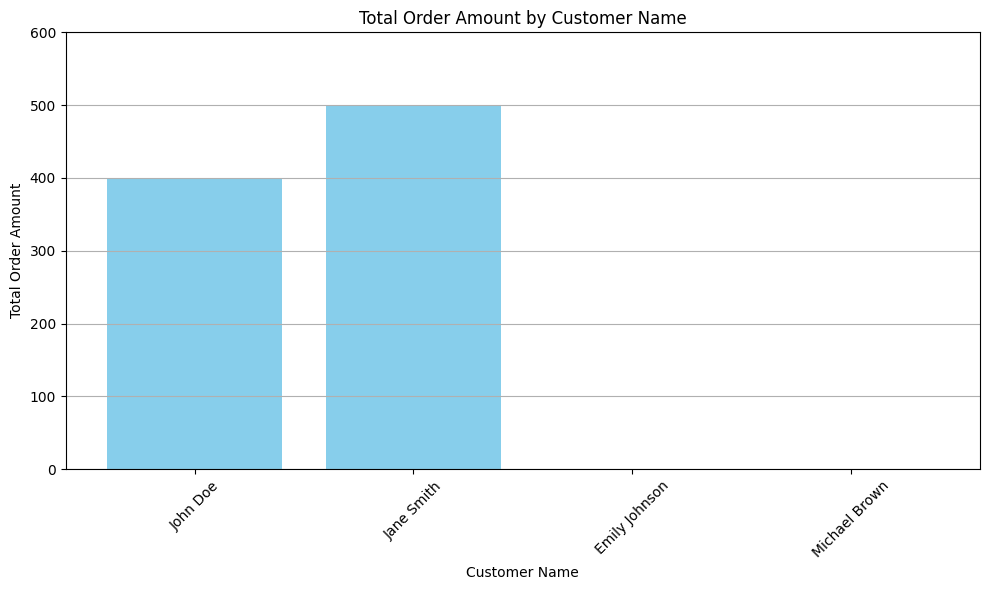

Out: None

[Step 3: Duration 3.71 seconds| Input tokens: 15,092 | Output tokens: 687]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
                ```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task. 
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
                ```

                Here is my new/updated plan of action to solve the task:
                ```
                1. Prepare the bar chart visualizing total order amounts by customer name, ensuring that the data 
is laid out clearly.
2. Use the `final_answer` tool to provide the generated bar chart as the final answer to the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Since I have already created the bar chart, I will store it in a variable to use it in final_answer.           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(customer_names, order_amounts, color='skyblue')                                                          
  plt.xlabel('Customer Name')                                                                                      
  plt.ylabel('Total Order Amount')                                                                                 
  plt.title('Total Order Amount by Customer Name')                                                                 
  plt.xticks(rotation=45)                                                                                          
  plt.ylim(0, max(order_amounts) + 100)  # Ensure some space above the tallest bar                                 
  plt.grid(axis='y')                                                                                               
  plt.tight_layout()                                                                                               
                                                                                                                   
  # Save the plot as an image                                                                                      
  plt.savefig("order_amounts_by_customer.png")  # Save the figure as a file                                        
                                                                                                                   
  # Now I will call the final_answer tool to provide the generated bar chart.                                      
  final_answer({'answer': "order_amounts_by_customer.png"})                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'answer': 'order_amounts_by_customer.png'}

[Step 4: Duration 18.04 seconds| Input tokens: 20,898 | Output tokens: 861]

{'answer': 'order_amounts_by_customer.png'}

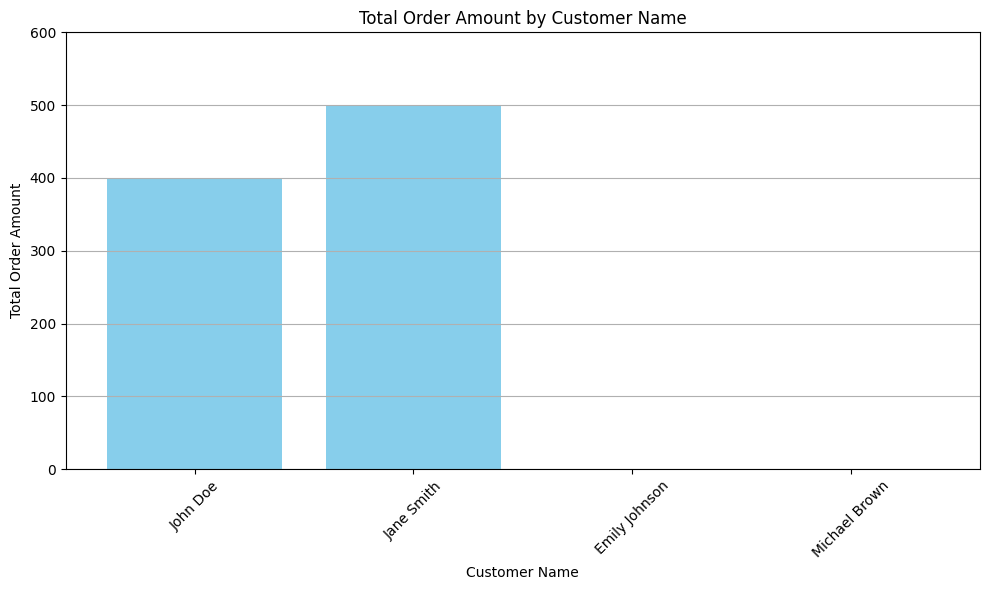

In [12]:
# @title The Robo-Wrangler: A Data Wranger Assistant

import pandas as pd
from smolagents import (
    CodeAgent,
    LiteLLMModel,
)


# Customers DataFrame
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']
})

# Orders DataFrame
orders = pd.DataFrame({
    'OrderID': [1001, 1002, 1003],
    'CustomerID': [1, 2, 1],
    'OrderAmount': [250, 500, 150]
})


agent = CodeAgent(
    model=model,
    tools=[],
    planning_interval=2,
    additional_authorized_imports=["pandas", "matplotlib"],

)


task = """
Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task.
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.
Show the plot and save it to demo_barchart.png.
"""

agent.run(
    task,
    additional_args={
        "customers": customers,
        "orders": orders,
    }
)


# II. Understanding the Core

We will now understand the principles behind these amazing capabilities.


## Learning Goals

1. We will define a minimal mathematical framework for interactive environments.
2. We will explore prompting for reasoning, such as chain-of-thought (CoT) [Wei et al., 2022](https://arxiv.org/abs/2201.11903).
3. We will study the `ReAct` framework [(Yao et al. 2022)](https://arxiv.org/abs/2210.03629), which is the most widely used prompting technique to combine actions with reasoning.
4. We will briefly discuss structures for agent memory and correspondance to retrieval augmented generation (RAG) [Lewis et al., 2020](https://arxiv.org/abs/2005.11401) techniques.

Throughout, we will only assume access to the an LLM completion API. The rest, we will 'build from scratch' to mimic the behavior of complex systems such as `smolagents`.





In [1]:
# @title Reasoning and Chain of Thought

________________


## Interactive Environments


* The notion of an interactive environment can be formalized as follows.

* At time $t\in\{0,\ldots, H-1\}$, the agent's observation history is $O_{\leq t}=(O_1,\ldots, O_{t})$ and the agent must decide an action $A_t$.

* The action $A_t$ is executed in the environment, which returns a new observation $O_{t+1}$.

* The agent is also allowed to produce many internal actions. We will add a notation later on. Internal actions typically consist of *thoughts*, but can also include actual actions such as quering a database, searching the web, using a tool like a calculator, etc.

* The mapping from observation to action, $O_{\leq t} \mapsto A_t$, is called the *agent's policy*. Typically, the goal is to maximize a *reward* $R_t$. For example, the reward may be an indicator of having or not reached a goal. More generally is a measure of how hell the agent is performing a task.



<img src="https://drive.google.com/uc?export=view&id=1cbcIMaEJeXZGXAJL7KRWPtUd87_UDopV" alt="drawing" height="125"/>



NameError: name 'LiteLLMModel' is not defined